(100, 6)
          x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
0 -1.000000  11.624419   8.296963  12.201067   7.811725   3.155566
1 -0.929293  10.377466   9.674440  12.198084   8.275006   7.518855
2 -0.858586  10.585100   9.251983  13.186565  12.926586   9.963630
3 -0.787879  10.913928   7.786344  12.552304  11.832379   9.625801
4 -0.717172   8.640287   8.551869   4.741432   8.790834   6.624113
           x  y_noise_1  y_noise_2  y_noise_3  y_noise_4  y_noise_5
95  5.717172  -1.411918   0.822231  -2.027132  -1.825106   2.746147
96  5.787879   0.344879  -1.718956   2.747559  -6.803779  -5.137472
97  5.858586   0.307133   0.353528   0.967976   5.461567  -0.905616
98  5.929293   0.048657   0.159961   2.482130  -0.414616  -4.334548
99  6.000000  -0.193438  -2.244792   1.930035   4.992414  -6.872850
Index(['x', 'y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5'], dtype='object')


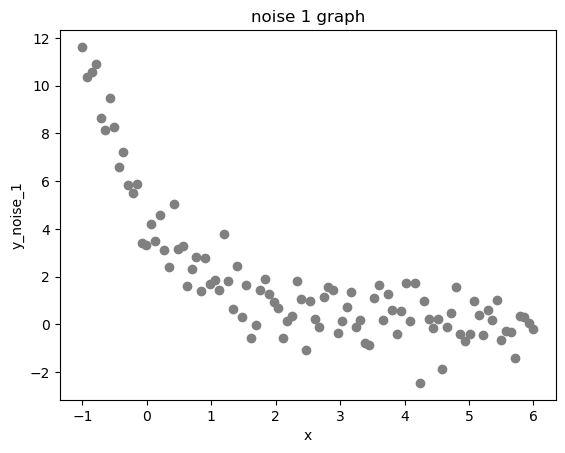

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv('noisy_curvefit_data.csv')

print(data.shape)
#rows is first number, cols 2nd number (100 rows, 6 cols)

print(data.head())
print(data.tail())

print(data.columns)

plt.scatter(data['x'], data['y_noise_1'], color='gray', label='Plot 1')
plt.xlabel("x")
plt.ylabel("y_noise_1")
plt.title("noise 1 graph")
plt.show

Fit: y = 4.71 * e^(-0.92 * x)
Reduced chi-squared: 0.79


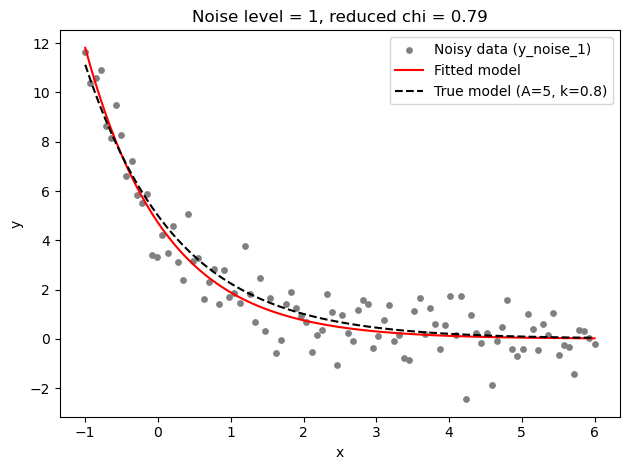

In [9]:
def model(x, A, k):
    return A * np.exp(-k * x)

x = data['x']
y = data['y_noise_1']

p0 = [1,1]
popt, pcov = curve_fit(model, x, y, p0=p0)

A_fit, k_fit = popt

print(f"Fit: y = {A_fit:.2f} * e^(-{k_fit:.2f} * x)")

res = y - model(x, A_fit, k_fit)
chi = np.sum(res**2)
dof = len(x) - len(popt)
chi_red = chi/dof

print(f"Reduced chi-squared: {chi_red:.2f}")

plt.figure()
plt.scatter(x, y, color='gray', s=15, label='Noisy data (y_noise_1)')
plt.plot(x, model(x, A_fit, k_fit), 'r-', label='Fitted model')
plt.plot(x, model(x, 5, 0.8), 'k--', label='True model (A=5, k=0.8)')
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Noise level = 1, reduced chi = {chi_red:.2f}")
plt.legend()
plt.tight_layout()
plt.show()

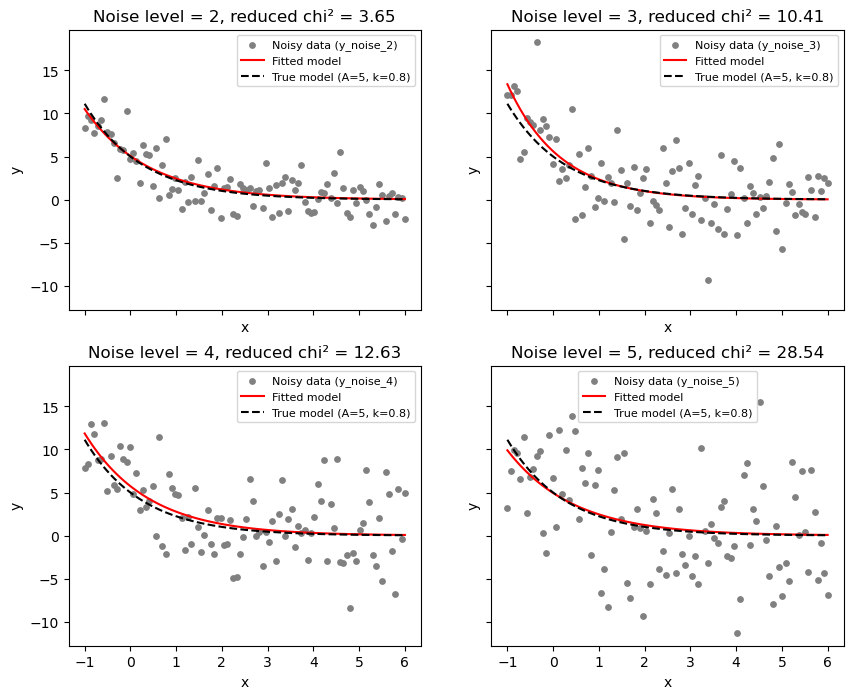

In [11]:
x = data['x']

def fit_model(x, y):
    p0 = [1, 1]  # initial guess for [A, k]
    popt, pcov = curve_fit(model, x, y, p0=p0)

    A_fit, k_fit = popt
    residuals = y - model(x, A_fit, k_fit)
    chi2 = np.sum(residuals**2)
    dof = len(x) - len(popt)  # N - number of parameters
    chi2_reduced = chi2 / dof

    return A_fit, k_fit, chi2_reduced

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

noise_cols = ['y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5']
noise_levels = [2, 3, 4, 5]

for ax, col, level in zip(axes, noise_cols, noise_levels):
    y = data[col].values

    A_fit, k_fit, chi2_reduced = fit_model(x, y)

    ax.scatter(x, y, color='gray', s=15, label=f'Noisy data ({col})')

    ax.plot(x, model(x, A_fit, k_fit), 'r-', label='Fitted model')

    ax.plot(x, model(x, 5, 0.8), 'k--', label='True model (A=5, k=0.8)')

    ax.set_title(f"Noise level = {level}, reduced chi² = {chi2_reduced:.2f}")

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.legend(fontsize=8)

plt.show()

In [13]:
results = []

noise_cols = ['y_noise_1', 'y_noise_2', 'y_noise_3', 'y_noise_4', 'y_noise_5']
noise_levels = [1, 2, 3, 4, 5]

for level, col in zip(noise_levels, noise_cols):
    y = data[col].values
    A_fit, k_fit, chi2_reduced = fit_model(x, y)

    results.append({
        "Noise level": level,
        "A_fit": A_fit,
        "k_fit": k_fit,
        "chi2_reduced": chi2_reduced
    })

df = pd.DataFrame(results, columns=["Noise level", "A_fit", "k_fit", "chi2_reduced"])
print(df)

df.to_csv("noisy_parameters.csv", index=False)

   Noise level     A_fit     k_fit  chi2_reduced
0            1  4.714814  0.918308      0.790673
1            2  5.063889  0.730396      3.649382
2            3  5.609396  0.870372     10.410207
3            4  5.738727  0.725965     12.626832
4            5  4.943458  0.695012     28.538124
